# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [115]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Challenge 1 - Import and Describe the Dataset

In this lab, we will use a dataset containing information about customer preferences. We will look at how much each customer spends in a year on each subcategory in the grocery store and try to find similarities using clustering.

The origin of the dataset is [here](https://archive.ics.uci.edu/ml/datasets/wholesale+customers).

In [116]:
customers = pd.read_csv('../data/Wholesale customers data.csv')

#### Explore the dataset with mathematical and visualization techniques. What do you find?

Checklist:

* What does each column mean?
* Any categorical data to convert?
* Any missing data to remove?
* Column collinearity - any high correlations?
* Descriptive statistics - any outliers to remove?
* Column-wise data distribution - is the distribution skewed?
* Etc.

Additional info: Over a century ago, an Italian economist named Vilfredo Pareto discovered that roughly 20% of the customers account for 80% of the typical retail sales. This is called the [Pareto principle](https://en.wikipedia.org/wiki/Pareto_principle). Check if this dataset displays this characteristic.

In [117]:
customers.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [118]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


<AxesSubplot:>

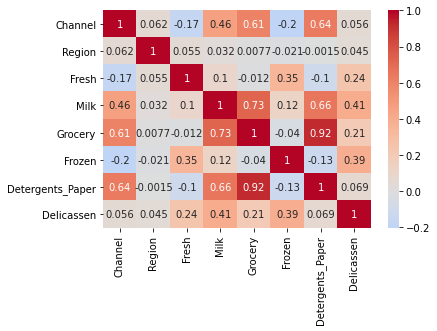

In [119]:
sns.heatmap(customers.corr(), center=0, cmap = "coolwarm", annot = True) #Detergents paper and Grocery are highly correlated

In [120]:
customers[['Fresh', 'Milk',"Grocery","Frozen","Detergents_Paper","Delicassen"]].describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [121]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,8

<AxesSubplot:>

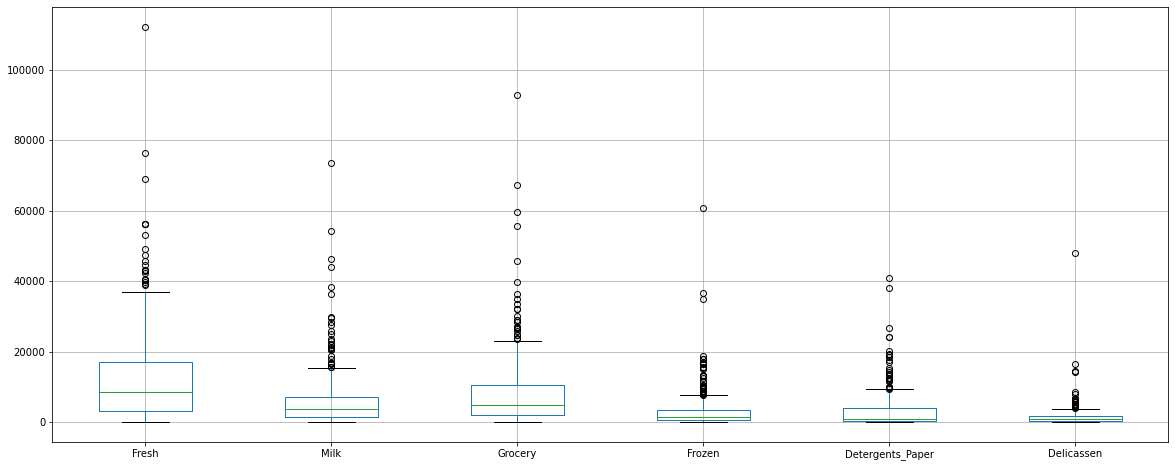

In [122]:
customers[['Fresh', 'Milk',"Grocery","Frozen","Detergents_Paper","Delicassen"]].boxplot()

In [123]:
from scipy import stats

In [124]:
stats.skew(customers[['Fresh', 'Milk',"Grocery","Frozen","Detergents_Paper","Delicassen"]]) 
#All the numerical values are highly skewed (greater than 1). All of them positively skewed. (We can also see that by looking at the shape of the box plot)

array([ 2.55258269,  4.03992212,  3.57518722,  5.88782573,  3.61945758,
       11.11353365])

# Challenge 2 - Data Cleaning and Transformation

If your conclusion from the previous challenge is the data need cleaning/transformation, do it in the cells below. However, if your conclusion is the data need not be cleaned or transformed, feel free to skip this challenge. But if you do choose the latter, please provide rationale.

### We delete the outliers

In [125]:
z = np.abs(stats.zscore(customers[['Fresh', 'Milk',"Grocery","Frozen","Detergents_Paper","Delicassen"]]))
print(z)

[[0.05293319 0.52356777 0.04111489 0.58936716 0.04356873 0.06633906]
 [0.39130197 0.54445767 0.17031835 0.27013618 0.08640684 0.08915105]
 [0.44702926 0.40853771 0.0281571  0.13753572 0.13323164 2.24329255]
 ...
 [0.20032554 1.31467078 2.34838631 0.54337975 2.51121768 0.12145607]
 [0.13538389 0.51753572 0.60251388 0.41944059 0.56977032 0.21304614]
 [0.72930698 0.5559243  0.57322717 0.62009417 0.50488752 0.52286938]]


In [126]:
threshold = 3
print(np.where(z > 3))

(array([ 23,  23,  39,  47,  47,  47,  56,  56,  61,  61,  61,  65,  65,
        71,  85,  85,  85,  86,  86,  87,  92,  93, 103, 103, 125, 181,
       181, 183, 183, 183, 196, 211, 211, 211, 216, 251, 258, 259, 284,
       325, 333, 333, 413], dtype=int64), array([1, 5, 0, 1, 2, 4, 1, 4, 1, 2, 4, 2, 4, 5, 1, 2, 4, 1, 4, 5, 4, 3,
       0, 3, 0, 0, 1, 1, 3, 5, 3, 1, 2, 4, 2, 4, 0, 0, 0, 3, 2, 4, 3],
      dtype=int64))


In [127]:
rows_outliers = sorted(list(set(list(np.where(z > 3)[0]))))
print(rows_outliers)

[23, 39, 47, 56, 61, 65, 71, 85, 86, 87, 92, 93, 103, 125, 181, 183, 196, 211, 216, 251, 258, 259, 284, 325, 333, 413]


In [128]:
customers = customers.drop(rows_outliers)

<AxesSubplot:>

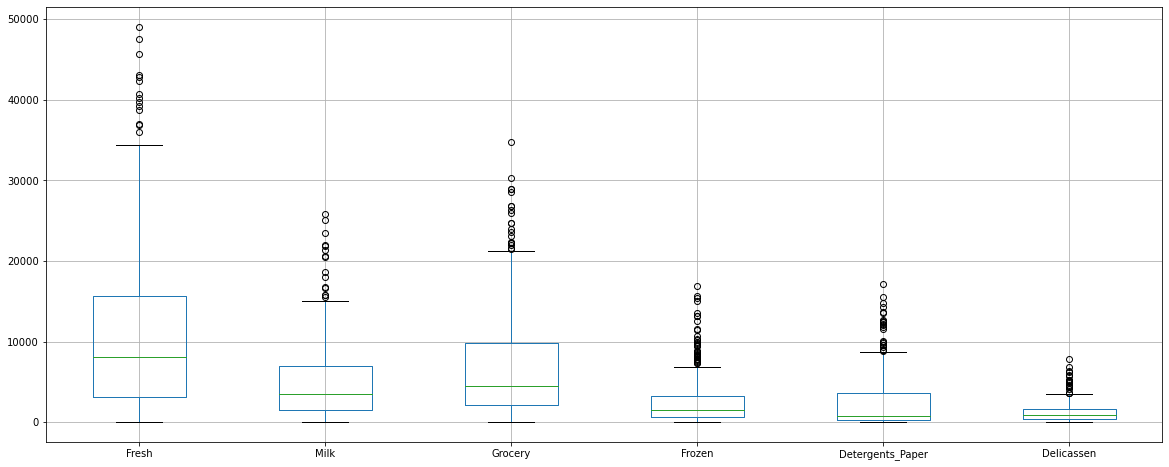

In [129]:
customers[['Fresh', 'Milk',"Grocery","Frozen","Detergents_Paper","Delicassen"]].boxplot()

### We check the skewness again

In [130]:
stats.skew(customers[['Fresh', 'Milk',"Grocery","Frozen","Detergents_Paper","Delicassen"]]) # it has improved

array([1.35032644, 1.72331987, 1.54013888, 2.12707219, 1.86696732,
       2.0425264 ])

### We convert the categorical columns to categorical an then we do get dummies

In [131]:
customers["Channel"] =customers["Channel"].replace(1,"Horeca").replace(2,"Retail")

In [132]:
customers["Region"] = customers["Region"].replace(3,"Other Region").replace(2,"Oporto").replace(1,"Lisbon")

In [133]:
customers = pd.get_dummies(customers, drop_first=True) #we use drop_first = True to avoid the collinearity

In [134]:
customers.shape

(414, 9)

In [135]:
customers.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Channel_Retail,Region_Oporto,Region_Other Region
0,12669,9656,7561,214,2674,1338,1,0,1
1,7057,9810,9568,1762,3293,1776,1,0,1
2,6353,8808,7684,2405,3516,7844,1,0,1
3,13265,1196,4221,6404,507,1788,0,0,1
4,22615,5410,7198,3915,1777,5185,1,0,1


<AxesSubplot:>

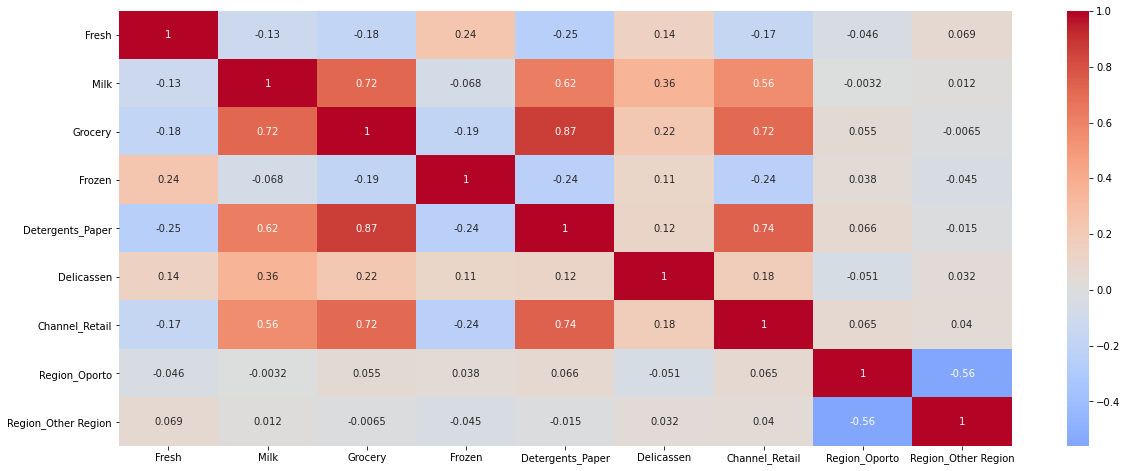

In [136]:
sns.heatmap(customers.corr(), center=0, cmap = "coolwarm", annot = True) #now I see that the correlation between Grocery and Detergents is smaller, so for now we won't delete one of the two columns

# Challenge 3 - Data Preprocessing

One problem with the dataset is the value ranges are remarkably different across various categories (e.g. `Fresh` and `Grocery` compared to `Detergents_Paper` and `Delicassen`). If you made this observation in the first challenge, you've done a great job! This means you not only completed the bonus questions in the previous Supervised Learning lab but also researched deep into [*feature scaling*](https://en.wikipedia.org/wiki/Feature_scaling). Keep on the good work!

Diverse value ranges in different features could cause issues in our clustering. The way to reduce the problem is through feature scaling. We'll use this technique again with this dataset.

#### We will use the `StandardScaler` from `sklearn.preprocessing` and scale our data. Read more about `StandardScaler` [here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler).

*After scaling your data, assign the transformed data to a new variable `customers_scale`.*

In [137]:
from sklearn.preprocessing import StandardScaler

In [138]:
customers_scale = pd.DataFrame(StandardScaler().fit_transform(customers),columns = customers.columns)

In [139]:
customers_scale

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Channel_Retail,Region_Oporto,Region_Other Region
0,0.199569,1.051409,0.115837,-0.801844,0.093798,0.082291,1.478044,-0.349215,0.623908
1,-0.372655,1.085254,0.427079,-0.270462,0.286944,0.442510,1.478044,-0.349215,0.623908
2,-0.444438,0.865042,0.134911,-0.049739,0.356526,5.432937,1.478044,-0.349215,0.623908
3,0.260340,-0.807866,-0.402125,1.322997,-0.582369,0.452379,-0.676570,-0.349215,0.623908
4,1.213706,0.118255,0.059543,0.468598,-0.186092,3.246130,1.478044,-0.349215,0.623908
...,...,...,...,...,...,...,...,...,...
409,1.936429,1.577764,1.428729,3.633548,-0.683778,0.794505,-0.676570,-0.349215,0.623908
410,2.907639,-0.756220,-0.938230,0.672844,-0.711549,0.911288,-0.676570,-0.349215,0.623908
411,0.389426,2.333122,3.633321,-0.725295,3.890255,0.517350,1.478044,-0.349215,0.623908
412,-0.043004,-0.635345,-0.710575,-0.518989,-0.688147,0.729534,-0.676570,-0.349215,0.623908


# Challenge 3 - Data Clustering with K-Means

Now let's cluster the data with K-Means first. Initiate the K-Means model, then fit your scaled data. In the data returned from the `.fit` method, there is an attribute called `labels_` which is the cluster number assigned to each data record. What you can do is to assign these labels back to `customers` in a new column called `customers['labels']`. Then you'll see the cluster results of the original data.

In [140]:
from sklearn.cluster import KMeans

In [141]:
inertias = [KMeans(k).fit(customers_scale).inertia_ for k in range(1,10)]
inertias

[3725.999999999999,
 2646.2880390896817,
 2247.0473916733854,
 1955.2936554326777,
 1756.6430340921083,
 1565.7538055925504,
 1410.9426452655287,
 1291.1845547686441,
 1230.3312538110802]

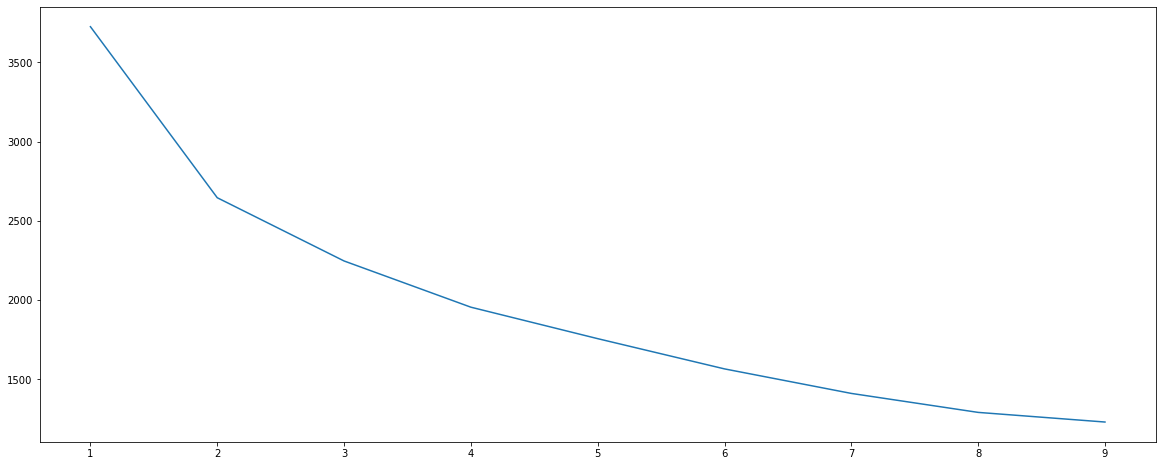

In [142]:
plt.plot(range(1,10), inertias) #with this graph I can see that my number of clusters should be probably 2

In [143]:
kmeans = KMeans(n_clusters = 2).fit(customers_scale) 

In [144]:
customers['labels'] = kmeans.labels_

In [145]:
clusters = kmeans.predict(customers_scale)

In [146]:
import matplotlib.pyplot as plt

Count the values in `labels`.

In [147]:
customers["labels"].value_counts()

0    287
1    127
Name: labels, dtype: int64

# Challenge 4 - Data Clustering with DBSCAN

Now let's cluster the data using DBSCAN. Use `DBSCAN(eps=0.5)` to initiate the model, then fit your scaled data. In the data returned from the `.fit` method, assign the `labels_` back to `customers['labels_DBSCAN']`. Now your original data have two labels, one from K-Means and the other from DBSCAN.

In [148]:
from sklearn.cluster import DBSCAN
clustering = DBSCAN(eps=0.5).fit(customers_scale)

Count the values in `labels_DBSCAN`.

In [149]:
customers['labels_DBSCAN'] = clustering.labels_

In [150]:
customers['labels_DBSCAN'].value_counts()

-1    343
 0     71
Name: labels_DBSCAN, dtype: int64

# Challenge 5 - Compare K-Means with DBSCAN

Now we want to visually compare how K-Means and DBSCAN have clustered our data. We will create scatter plots for several columns. For each of the following column pairs, plot a scatter plot using `labels` and another using `labels_DBSCAN`. Put them side by side to compare. Which clustering algorithm makes better sense?

Columns to visualize:

* `Detergents_Paper` as X and `Milk` as y
* `Grocery` as X and `Fresh` as y
* `Frozen` as X and `Delicassen` as y

Visualize `Detergents_Paper` as X and `Milk` as y by `labels` and `labels_DBSCAN` respectively

Text(0.5, 1.0, 'D-BSCAN with 2 clusters')

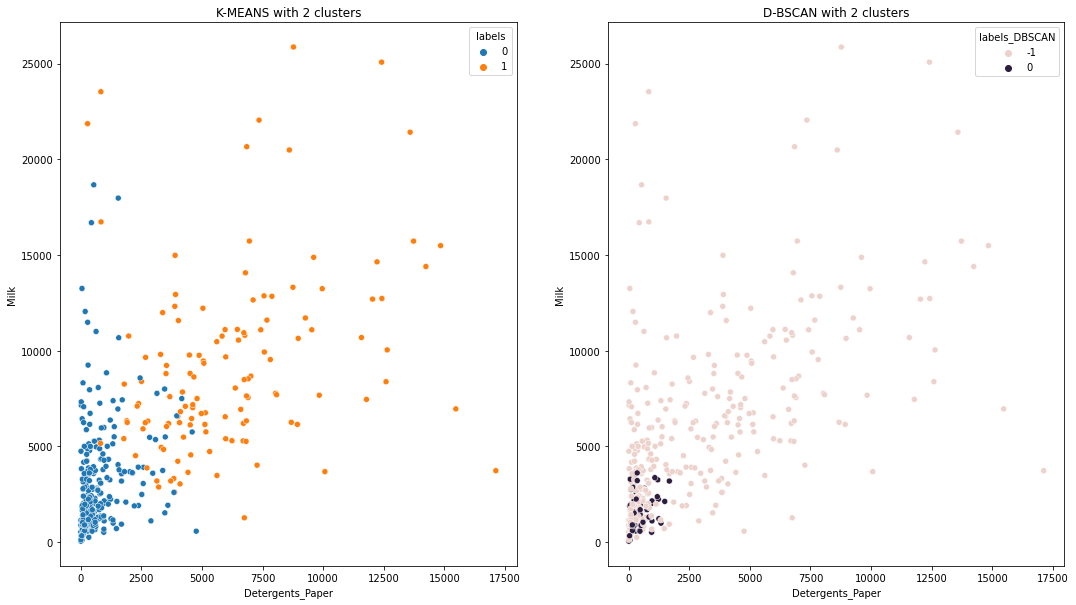

In [151]:
fig, axes = plt.subplots(1,2 , figsize=(18, 10))
sns.scatterplot(ax=axes[0], data=customers, x = "Detergents_Paper", y = "Milk", hue = customers["labels"])
sns.scatterplot(ax=axes[1], data=customers, x = "Detergents_Paper", y = "Milk", hue = customers["labels_DBSCAN"])
axes[0].set_title("K-MEANS with 2 clusters")
axes[1].set_title("D-BSCAN with 2 clusters")

Visualize `Grocery` as X and `Fresh` as y by `labels` and `labels_DBSCAN` respectively

Text(0.5, 1.0, 'D-BSCAN with 2 clusters')

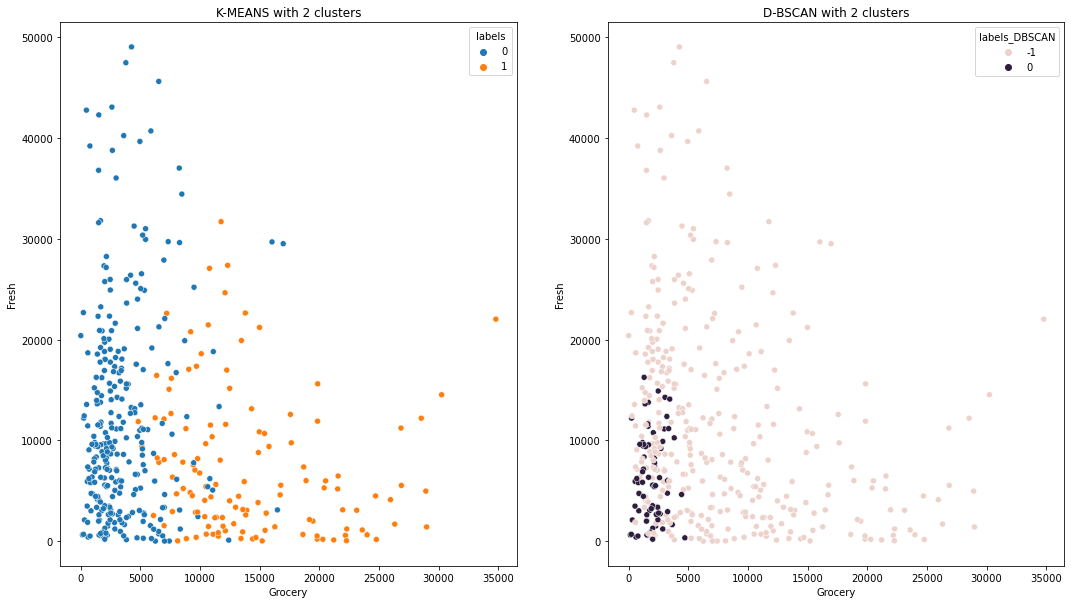

In [152]:
fig, axes = plt.subplots(1,2 , figsize=(18, 10))
sns.scatterplot(ax=axes[0], data=customers, x = "Grocery", y = "Fresh", hue = customers["labels"])
sns.scatterplot(ax=axes[1], data=customers, x = "Grocery", y = "Fresh", hue = customers["labels_DBSCAN"])
axes[0].set_title("K-MEANS with 2 clusters")
axes[1].set_title("D-BSCAN with 2 clusters")

Visualize `Frozen` as X and `Delicassen` as y by `labels` and `labels_DBSCAN` respectively

Text(0.5, 1.0, 'D-BSCAN with 2 clusters')

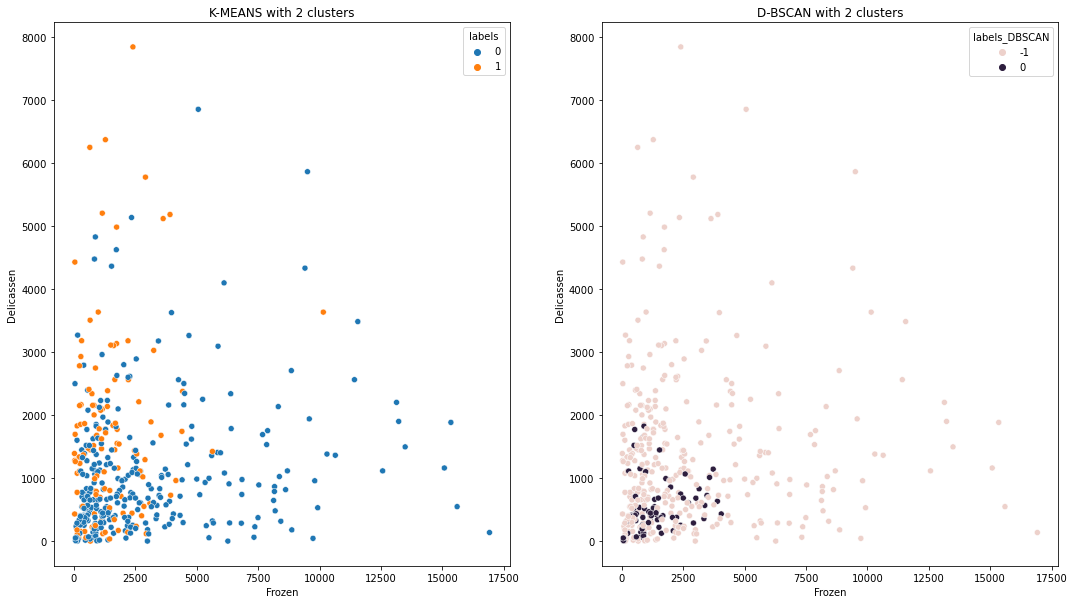

In [153]:
fig, axes = plt.subplots(1,2 , figsize=(18, 10))
sns.scatterplot(ax=axes[0], data=customers, x = "Frozen", y = "Delicassen", hue = customers["labels"])
sns.scatterplot(ax=axes[1], data=customers, x = "Frozen", y = "Delicassen", hue = customers["labels_DBSCAN"])
axes[0].set_title("K-MEANS with 2 clusters")
axes[1].set_title("D-BSCAN with 2 clusters")

Let's use a groupby to see how the mean differs between the groups. Group `customers` by `labels` and `labels_DBSCAN` respectively and compute the means for all columns.

In [154]:
customers.groupby(['labels']).mean()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Channel_Retail,Region_Oporto,Region_Other Region,labels_DBSCAN
labels,,,,,,,,,,
0,12161.703833,2945.595819,3525.874564,3054.038328,702.010453,1073.588850,0.031359,0.101045,0.703833,-0.752613
1,7435.110236,9225.110236,14244.787402,1410.622047,6150.456693,1609.346457,0.952756,0.125984,0.755906,-1.000000


In [155]:
customers.groupby(['labels_DBSCAN']).mean()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Channel_Retail,Region_Oporto,Region_Other Region,labels
labels_DBSCAN,,,,,,,,,,
-1,11641.819242,5565.478134,7822.857143,2781.938776,2779.647230,1377.119534,0.379009,0.131195,0.661808,0.370262
0,6218.647887,1521.352113,1940.478873,1428.915493,410.788732,565.563380,0.000000,0.000000,1.000000,0.000000


Which algorithm appears to perform better?

# Bonus Challenge 2 - Changing K-Means Number of Clusters

As we mentioned earlier, we don't need to worry about the number of clusters with DBSCAN because it automatically decides that based on the parameters we send to it. But with K-Means, we have to supply the `n_clusters` param (if you don't supply `n_clusters`, the algorithm will use `8` by default). You need to know that the optimal number of clusters differs case by case based on the dataset. K-Means can perform badly if the wrong number of clusters is used.

In advanced machine learning, data scientists try different numbers of clusters and evaluate the results with statistical measures (read [here](https://en.wikipedia.org/wiki/Cluster_analysis#External_evaluation)). We are not using statistical measures today but we'll use our eyes instead. In the cells below, experiment with different number of clusters and visualize with scatter plots. What number of clusters seems to work best for K-Means?

Text(0.5, 1.0, '7 clusters')

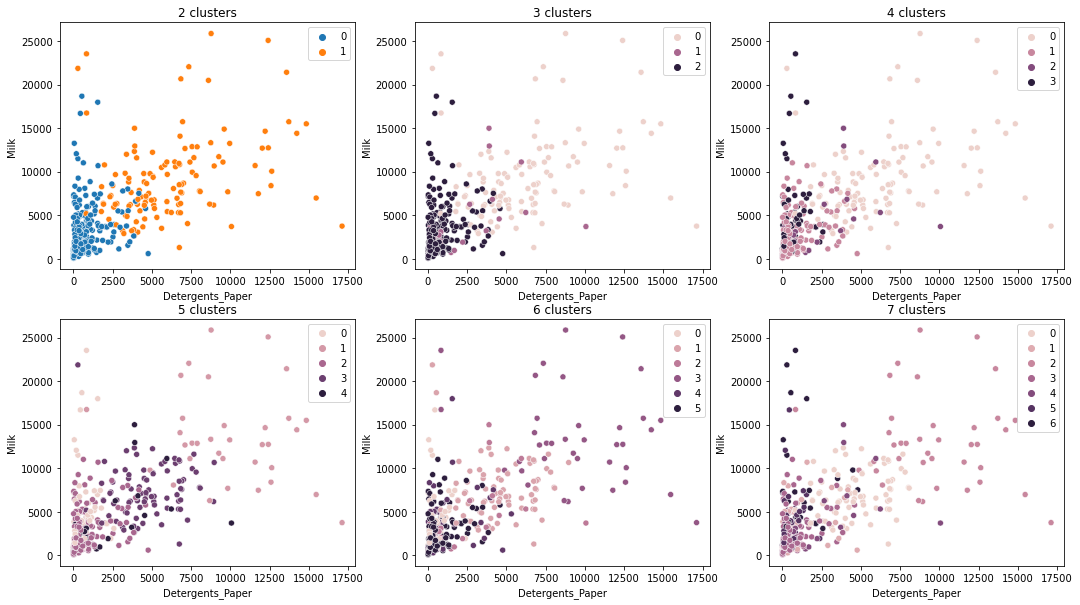

In [156]:
fig, axes = plt.subplots(2,3 , figsize=(18, 10))
sns.scatterplot(ax=axes[0,0], data=customers, x = "Detergents_Paper", y = "Milk", hue = KMeans(n_clusters = 2).fit(customers_scale).labels_)
sns.scatterplot(ax=axes[0,1], data=customers, x = "Detergents_Paper", y = "Milk", hue = KMeans(n_clusters = 3).fit(customers_scale).labels_)
sns.scatterplot(ax=axes[0,2], data=customers, x = "Detergents_Paper", y = "Milk", hue = KMeans(n_clusters = 4).fit(customers_scale).labels_)
sns.scatterplot(ax=axes[1,0], data=customers, x = "Detergents_Paper", y = "Milk", hue = KMeans(n_clusters = 5).fit(customers_scale).labels_)
sns.scatterplot(ax=axes[1,1], data=customers, x = "Detergents_Paper", y = "Milk", hue = KMeans(n_clusters = 6).fit(customers_scale).labels_)
sns.scatterplot(ax=axes[1,2], data=customers, x = "Detergents_Paper", y = "Milk", hue = KMeans(n_clusters = 7).fit(customers_scale).labels_)
axes[0,0].set_title("2 clusters")
axes[0,1].set_title("3 clusters")
axes[0,2].set_title("4 clusters")
axes[1,0].set_title("5 clusters")
axes[1,1].set_title("6 clusters")
axes[1,2].set_title("7 clusters")

# Bonus Challenge 3 - Changing DBSCAN `eps` and `min_samples`

Experiment changing the `eps` and `min_samples` params for DBSCAN. See how the results differ with scatter plot visualization.

In [157]:
# Your code here